In [4]:
### PCA for the data set from HW2 (training set, after scaling)

import numpy  as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
import pandas as pd
from matplotlib import cm

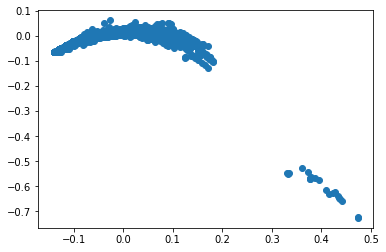

In [6]:
###

dir = "/Users/mslawsk3/Dropbox/gmu/teaching/stat672_2022/hw/"

X = np.array(pd.read_csv(dir + "hw2_X.csv", sep=',', header=None))


### center, scale

n, d  = np.shape(X)

means = np.mean(X, 0)

# scale and center columns 

for j in np.arange(d):
    tmp = X[:,j]
    tmp = tmp - means[j]
    X[:,j] = tmp / np.sqrt(sum(tmp**2))

# compute PCA via SVD    
u, s, v = np.linalg.svd(X, compute_uv=True, full_matrices = False)

var_expl = np.cumsum(s**2)/np.sum(s**2)    

z = np.dot(u, np.diag(s))

plt.plot(z[:,0], z[:,1], 'o')

w = np.dot(X.T,  z[:,:2])
ww = np.dot(X.T,  u[:,:2])

In [7]:
# for comparison, sparse PCA

spca = SparsePCA(n_components=10, random_state=0, alpha = 0.05, method = 'cd', ridge_alpha = 0.0001)
spca.fit(X)
V = spca.components_
np.mean(V == 0)
U = spca.transform(X)

# unexplained variance with sparsity: 0.06
np.sum((X - np.dot(U, V))**2)/np.sum(X**2)
# unexplained variance without sparsity: 0.055 --- we do not lose much by imposing sparsity !
ix = np.arange(10)
np.sum((X - np.dot(u[:,ix]*s[ix], v[ix,:]))**2)/np.sum(X**2)

0.055594987966218784

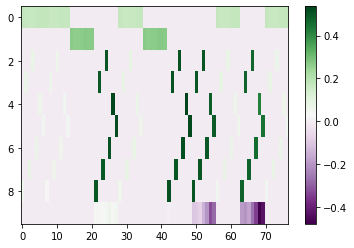

In [8]:
# visualize sparse factor loadings
plt.imshow(V, cmap=cm.PRGn, interpolation='nearest', aspect = 'auto')
plt.colorbar()

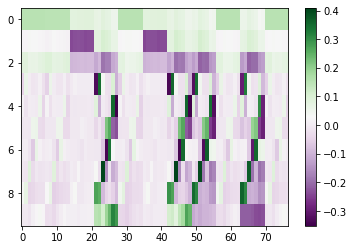

In [9]:
# for comparison, original factor loadings
plt.imshow(v[ix,:], cmap=cm.PRGn, interpolation='nearest', aspect = 'auto')
plt.colorbar()